In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from logging import RootLogger
# Mount Google Drive
from google.colab import drive # import drive from google colab

root = "/content/drive"     # default location for the drive

drive.mount(root)           # we mount the google drive at /content/drive

# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
my_google_drive_path = "MyDrive/StudentProject2023"

project_path = join(root, my_google_drive_path)

df = pd.read_csv(join(project_path,"processed_data/table_complete.csv"), sep=",")
#Table complete with , separator be careful

Mounted at /content/drive


In [ ]:
df=df.rename(columns={'diff': 'diff_DZ10_AME'})

In [ ]:
target = df["BE/A_AME"]
n_input=df["N"]
z_input=df["Z"]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_n=scaler.fit_transform(pd.Series.to_numpy(n_input).reshape(-1,1))
scaled_z=scaler.fit_transform(pd.Series.to_numpy(z_input).reshape(-1,1))
scaled_target=scaler.fit_transform(pd.Series.to_numpy(target).reshape(-1,1))

In [ ]:
input1=keras.layers.Input(shape=(1,))
input2=keras.layers.Input(shape=(1,))
merged = keras.layers.Concatenate()([input1, input2])
dense1 = keras.layers.Dense(64, input_dim=2, activation="relu")(merged)
dense2 = keras.layers.Dense(64, activation="relu")(dense1)
dense3 = keras.layers.Dense(64, activation="relu")(dense2)
dense4 = keras.layers.Dense(64, activation="relu")(dense3)
output = keras.layers.Dense(1, activation="relu")(dense4)
model4 = keras.models.Model(([input1, input2]),output)

In [ ]:
model4.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

In [ ]:
history4=model4.fit(x=([scaled_n,scaled_z]), y=scaled_target,batch_size=11, epochs=150, shuffle=True, verbose=2)

plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

#Be careful : loss is mean_squared_error, not RMS, and is calculated among 
#Rescaled variable, so it doesn't mean a lot

In [ ]:


test_target = df["BE/A_AME"]
test_n_input=df["N"]
test_z_input=df["Z"]

scaler=MinMaxScaler(feature_range=(0,1))
test_scaled_n=scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z=scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_target=scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))
predictions = model4.predict(x=([test_scaled_n,test_scaled_z]), batch_size=1, verbose=0) ## we use the model 4

In [ ]:
df

,Z,N,BE/A_DZ10,MassExcess_DZ10,A,BE,S1n,S1p,S2p,S2n,MassExcess_AME,BE/A_AME,Atomic_Mass,diff_DZ10_AME
0,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274,13.694133,6.922055,16.014701,-0.023888
1,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935,5.683907,7.373797,16.006102,0.045798
2,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029,-4.737002,7.976207,15.994915,0.017783
3,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103,43.716322,5.269668,17.046931,-0.089966
4,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636,1.951701,7.542328,17.002095,0.045114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,118,175,7.093525,194.194092,293,2078.402804,6.431873,1.713150,2.306591,14.469980,198.802000,7.078000,293.213423,0.015525
3039,117,176,7.112990,189.273193,293,2084.106181,7.416527,0.628611,3.493342,13.816363,194.428000,7.095000,293.208727,0.017990
3040,118,176,7.096009,194.441895,294,2086.226581,7.823777,2.120400,2.749011,14.255650,199.320000,7.079000,294.213979,0.017009
3041,117,177,7.109862,191.151123,294,2090.299525,6.193344,1.036107,3.916508,13.609871,196.397000,7.092000,294.210840,0.017862


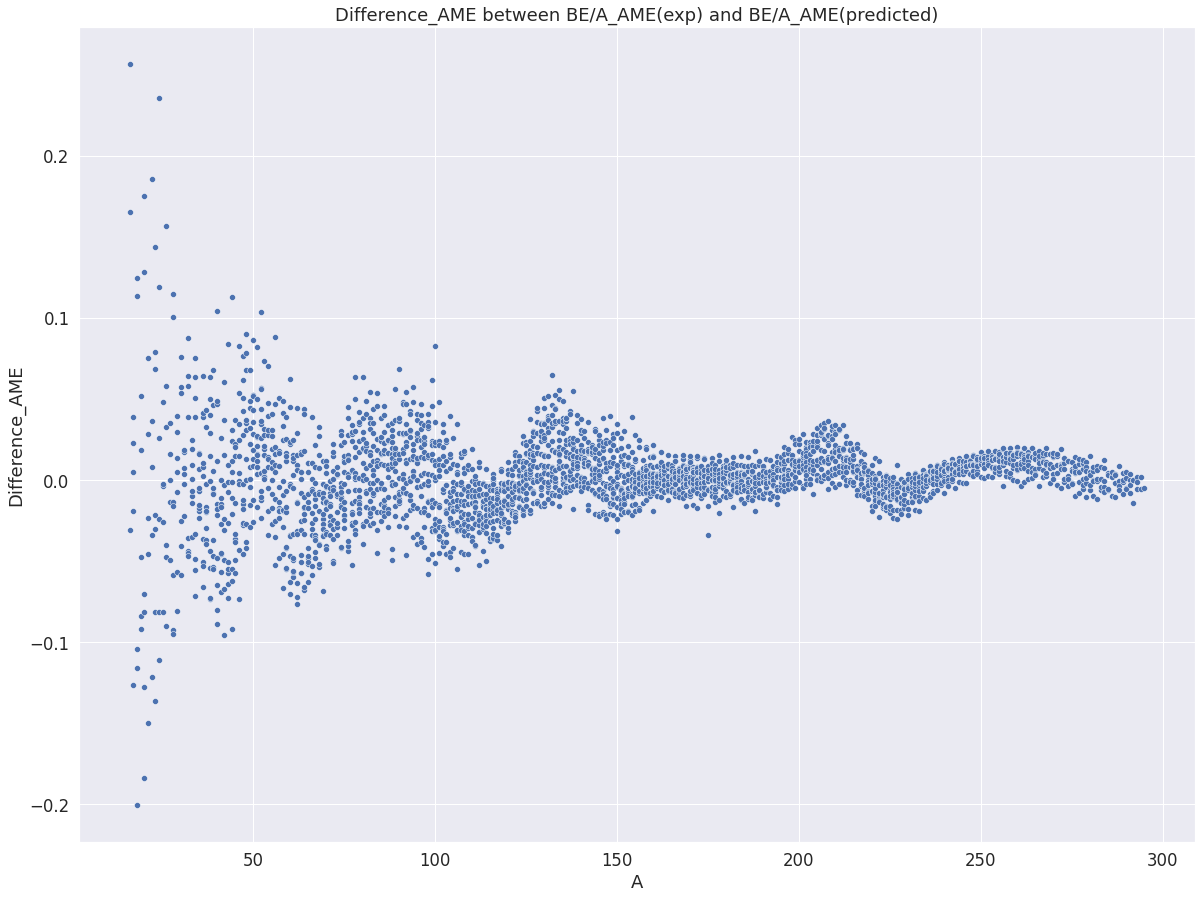

In [ ]:
rescaled_predictions=[(i - scaler.min_)/scaler.scale_ for i in predictions]


df["BE/A_Predictions"]=np.double(rescaled_predictions)
#df["BE/A_Predictions"]=df["BE/A_Predictions"]/1000
df["Difference_AME"]=df["BE/A_AME"]-df["BE/A_Predictions"]



plt.figure(figsize =(20,15))

plt.title('Difference_AME between BE/A_AME(exp) and BE/A_AME(predicted)')

sns.scatterplot(x="A",y="Difference_AME",data=df, palette="rainbow_r")

In [ ]:

test_target = df["BE/A_DZ10"]
test_n_input=df["N"]
test_z_input=df["Z"]

scaler=MinMaxScaler(feature_range=(0,1))
test_scaled_n=scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z=scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_target=scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))
predictions = model4.predict(x=([test_scaled_n,test_scaled_z]), batch_size=1, verbose=0) ## we use the model 4

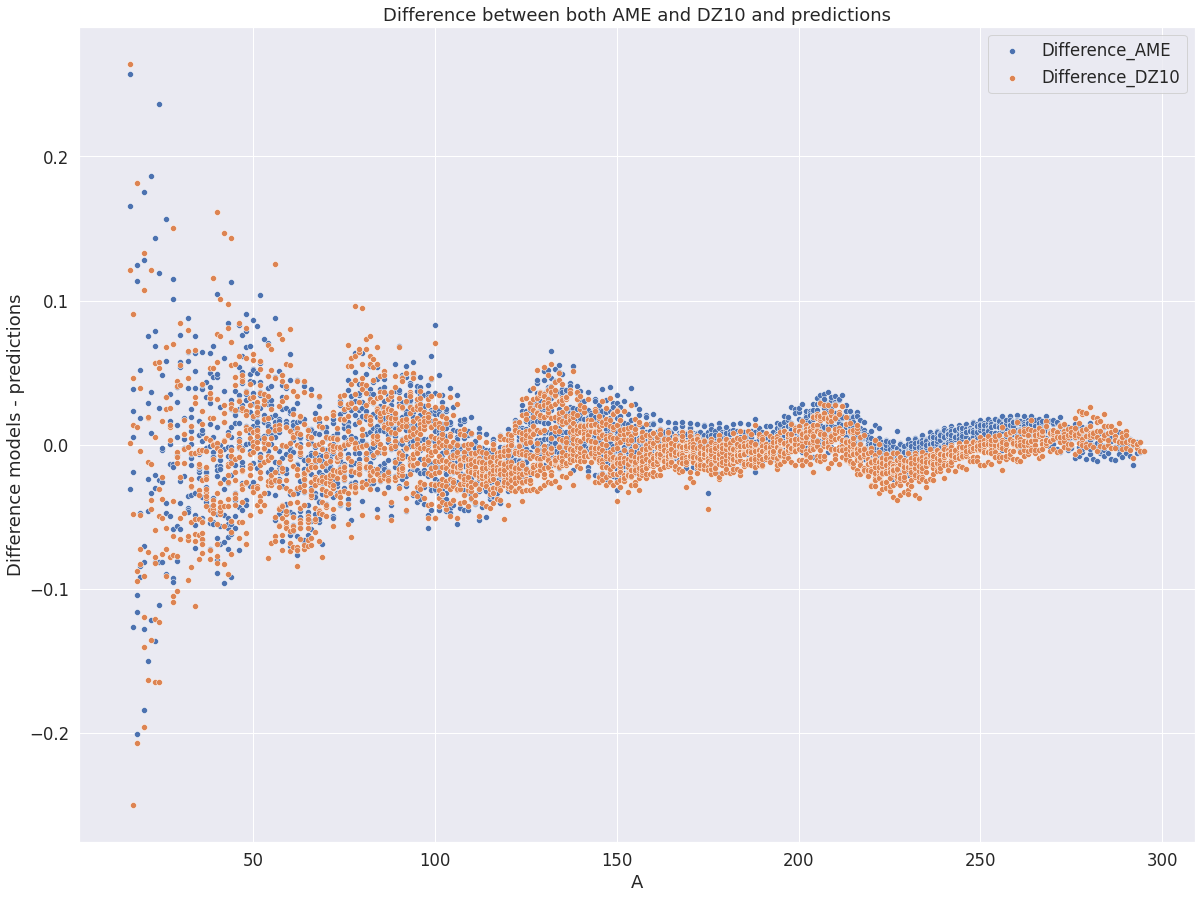

In [ ]:
rescaled_predictions=[(i - scaler.min_)/scaler.scale_ for i in predictions]


df["BE/A_Predictions"]=np.double(rescaled_predictions)
df["Difference_DZ10"]=df["BE/A_DZ10"]-df["BE/A_Predictions"]



plt.figure(figsize =(20,15))

plt.title('Difference between both AME and DZ10 and predictions')
plt.ylabel('Difference models - predictions')

sns.scatterplot(x="A",y="Difference_AME",data=df, label="Difference_AME", palette="rainbow_r")
sns.scatterplot(x="A",y="Difference_DZ10",data=df, label="Difference_DZ10", palette="rainbow_r")
plt.legend()

In [ ]:
def RMS(list) :
    """This function return the RMS value of the data in list"""
    sq_sum=0
    for i in range(len(list)) :
        sq_sum+=list[i]*list[i]
    return math.sqrt(sq_sum/len(list))

print(RMS(df["BE/A_Predictions"]))